# Project: Schedule Adherence Prediction

Objective:
To create a Python project that predicts whether a bus will arrive on time (schedule adherence) based on factors such as time of day, driver performance, and route-specific features. We will use a classification model to predict the likelihood of the bus arriving on time.

In [19]:
#data preprocessing

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


df=pd.read_csv(r"C:\Users\Abhishek\Downloads\public_transport_data.csv")
print(df.head())  

   AVL_id  Ticket_id  Schedule_id  Bus_id  Driver_id  Route_id  \
0    5861      76898          376     317       1809        29   
1    8927      62736          295     415       1264         9   
2    2780      39979          335      76       1099        43   
3    3337      51853          412     154       1210        69   
4    4275      93632          992     232       1229        23   

             Timestamp  Bus_Speed  Passenger_Count       Scheduled_Time  \
0  2024-09-10 07:09:00      48.70               95  2024-09-10 07:14:00   
1  2024-09-06 21:46:00      57.81                5  2024-09-06 21:55:00   
2  2024-09-22 05:32:00      73.26               78  2024-09-22 05:34:00   
3  2024-09-25 15:09:00      63.14               74  2024-09-25 15:16:00   
4  2024-09-30 08:30:00      53.85               30  2024-09-30 08:35:00   

           Actual_Time  Route_Delay  Bus_Fuel_Consumption  Bus_Behavior_Score  \
0  2024-09-10 07:30:00           16                 15.02              

In [20]:
# checking missing values 
print(df.isnull().sum())


AVL_id                  0
Ticket_id               0
Schedule_id             0
Bus_id                  0
Driver_id               0
Route_id                0
Timestamp               0
Bus_Speed               0
Passenger_Count         0
Scheduled_Time          0
Actual_Time             0
Route_Delay             0
Bus_Fuel_Consumption    0
Bus_Behavior_Score      0
Day_of_Week             0
dtype: int64


In [21]:
print(df.dtypes)

AVL_id                    int64
Ticket_id                 int64
Schedule_id               int64
Bus_id                    int64
Driver_id                 int64
Route_id                  int64
Timestamp                object
Bus_Speed               float64
Passenger_Count           int64
Scheduled_Time           object
Actual_Time              object
Route_Delay               int64
Bus_Fuel_Consumption    float64
Bus_Behavior_Score      float64
Day_of_Week              object
dtype: object


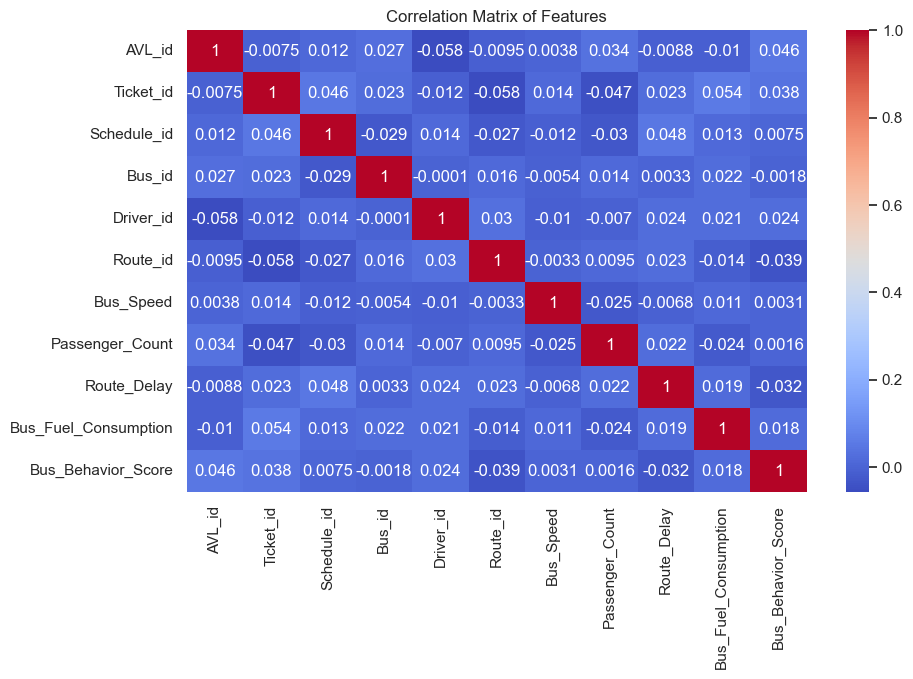

In [22]:
# Correlation matrix 
# Selecting only numeric columns by excluding non-numeric ones
numeric_df = df.drop(columns=['Timestamp', 'Scheduled_Time', 'Actual_Time', 'Day_of_Week'])

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))

# Visualizing the correlation matrix with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Matrix of Features")
plt.show()

All correlations between features are quite weak, with most values close to 0. This suggests that the features in this dataset don't have strong linear relationships with one another.Non-linear models, such as decision trees or ensemble methods like Random Forests, could be better suited to capture the hidden relationships between the features and the target variables.

In [43]:
#Target Variable

# Convert timestamps to datetime
df['Scheduled_Time'] = pd.to_datetime(df['Scheduled_Time'])
df['Actual_Time'] = pd.to_datetime(df['Actual_Time'])

# Create target variable
df['On_Time'] = (df['Actual_Time'] <= df['Scheduled_Time']).astype(int)


In [44]:
# Creating new features based on historical route and driver delays
df['avg_route_delay'] = df.groupby('Route_id')['Route_Delay'].transform('mean')
df['avg_driver_delay'] = df.groupby('Driver_id')['Route_Delay'].transform('mean')

In [45]:
#feautre engineering
# Extract day of the week and hour of the day from the timestamp
df['Day_of_Week'] = df['Scheduled_Time'].dt.dayofweek
df['Hour_of_Day'] = df['Scheduled_Time'].dt.hour


In [46]:
# Selecting relevant features and the target variable
X = df[['Route_id', 'Driver_id', 'Bus_Speed', 'Passenger_Count', 
        'Bus_Behavior_Score', 'Bus_Fuel_Consumption', 
        'avg_route_delay', 'avg_driver_delay', 'Day_of_Week', 'Hour_of_Day']]
y = df['On_Time']


In [47]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:


# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       238
           1       0.78      0.63      0.70        62

    accuracy                           0.89       300
   macro avg       0.84      0.79      0.81       300
weighted avg       0.88      0.89      0.88       300



Precision for on-time buses is at 0.78, meaning that 78% of the buses predicted to be on time actually are on time.The recall for on-time buses is now 0.63 this means that the model is now capturing 63% of all on-time buses.The model performs very well at predicting late buses, with high precision and recall.

In [41]:
#Implementing XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate the scale_pos_weight based on class imbalance
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=ratio, random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       238
           1       0.71      0.71      0.71        62

    accuracy                           0.88       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.88      0.88      0.88       300



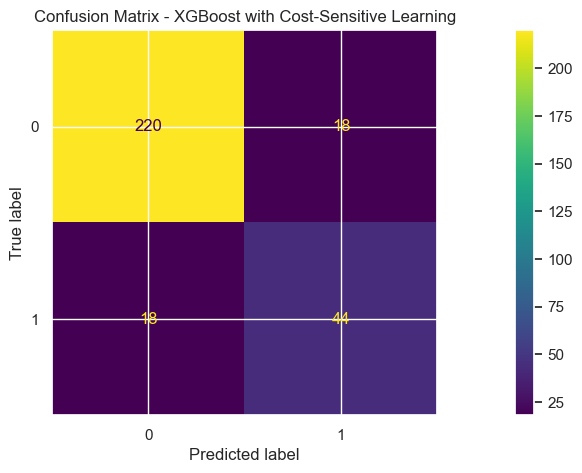

In [42]:
# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix - XGBoost with Cost-Sensitive Learning")
plt.show()


There is a small improvement in recall value for on time buses.The model is doing an excellent job of predicting late buses, with 220 out of 238 late buses correctly classified.The model correctly identified 44 out of 62 on-time buses.There are 18 false positives (late buses predicted as on-time) and 18 false negatives (on-time buses predicted as late). The errors are balanced across both types of misclassifications